In [ ]:
import os
from graphviz import Digraph
from IPython.display import display, Image

# Set the output directory for PNG files
output_dir = (
    "./notebook_output/convDL_architectures"
)
os.makedirs(output_dir, exist_ok=True)

# Visulizations of convDL Model Architecture

## CNN

CNNModel(
(conv1): Conv1d(100, 400, kernel_size=(1,), stride=(1,), padding=same)
(conv2): Conv1d(400, 200, kernel_size=(3,), stride=(1,), padding=same)
(conv3): Conv1d(200, 16, kernel_size=(5,), stride=(1,), padding=same)
(norm1): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
(norm2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
(norm3): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
(leaky_relu): LeakyReLU(negative_slope=0.01)
(pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
(dropout): Dropout(p=0.3, inplace=False)
(flatten): Flatten(start_dim=1, end_dim=-1)
(fc1): Linear(in_features=400, out_features=200, bias=True)
(fc1_bn): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
(fc2): Linear(in_features=200, out_features=1, bias=True)
)

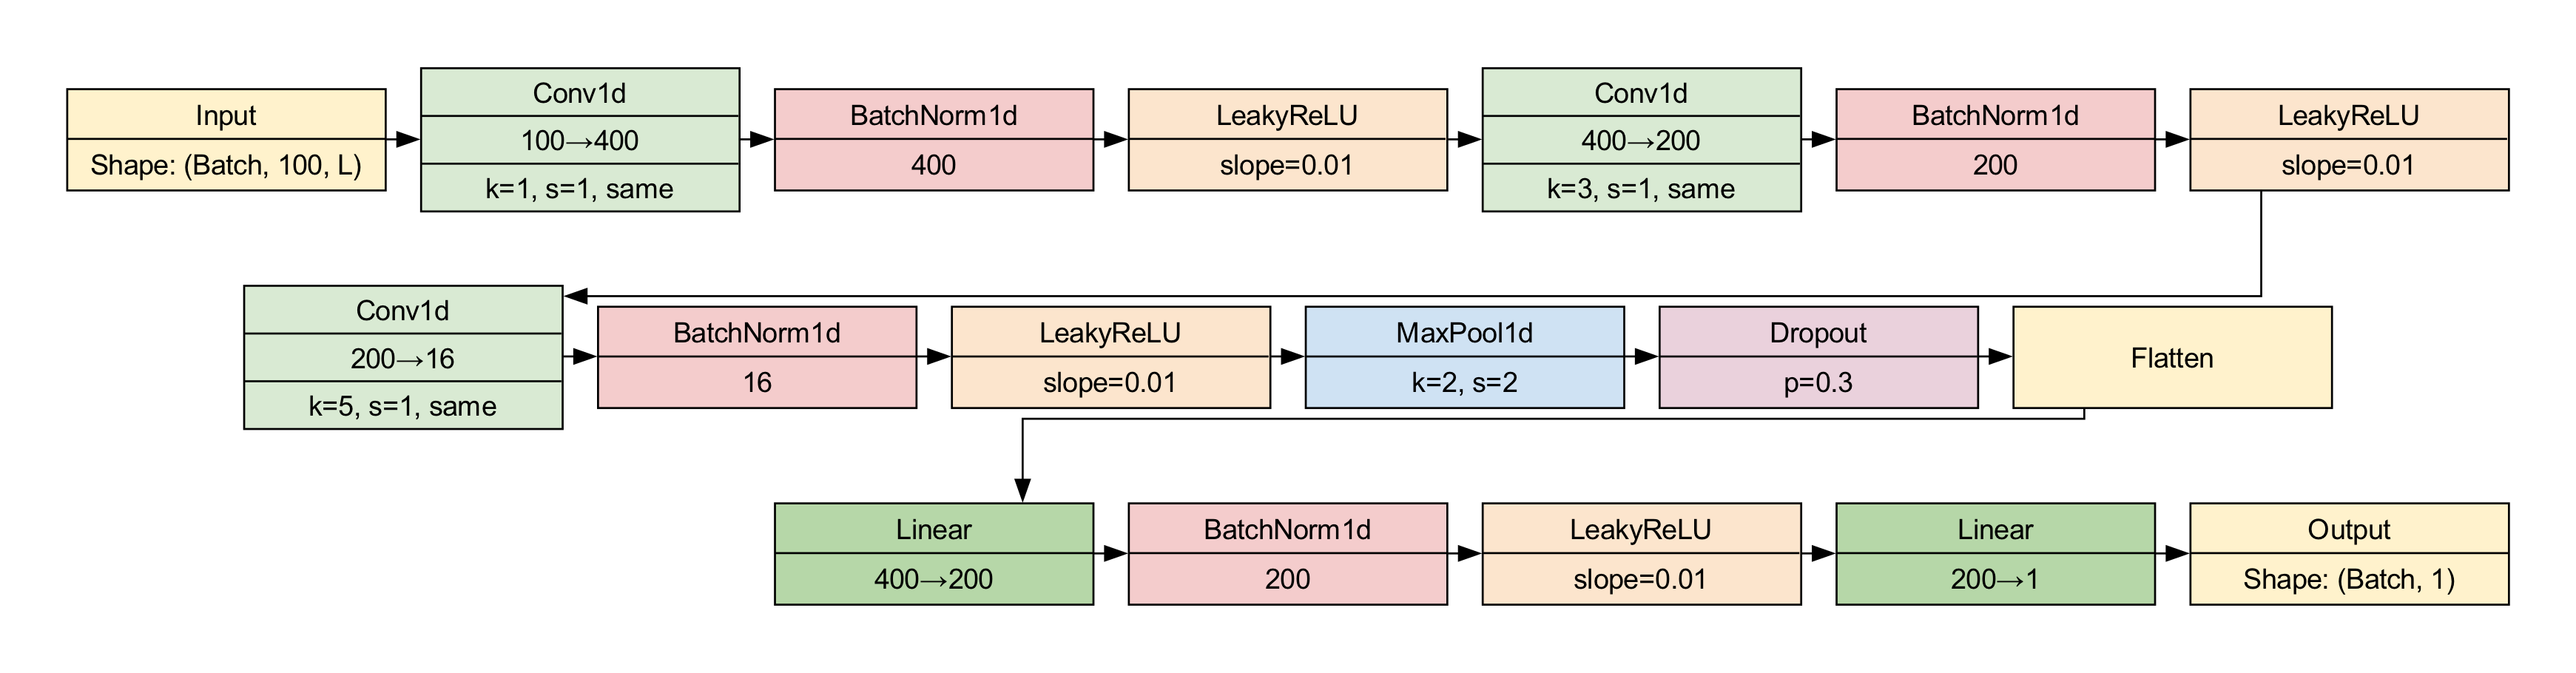

Saved architecture diagram to ./notebook_output/convDL_architectures/CNNModel_architecture.png


In [3]:
def cnnmodel_graphviz():
    dot = Digraph(format='png', graph_attr={
        'rankdir': 'TB',  # Top to Bottom
        'splines': 'ortho',
        'fontsize': '16',
        'size': '8.3,11.7!',  # A4 in inches (portrait)
        'ratio': 'compress',
        'page': '8.3,11.7',
        'orientation': 'portrait',
        'margin': '0.2,0.2'
    })
    dot.attr(dpi='400')
    dot.attr('node', shape='record', style='filled', fillcolor='#e6f2ff', fontname='Arial', fontsize='14', width='2.2', height='0.7')

    # Layer nodes
    dot.node('Input', '{Input | Shape: (Batch, 100, L)}', fillcolor='#fff2cc')
    dot.node('Conv1', '{Conv1d | 100→400 | k=1, s=1, same}', fillcolor='#d9ead3')
    dot.node('BN1', '{BatchNorm1d | 400}', fillcolor='#f4cccc')
    dot.node('ReLU1', '{LeakyReLU | slope=0.01}', fillcolor='#fce5cd')
    dot.node('Conv2', '{Conv1d | 400→200 | k=3, s=1, same}', fillcolor='#d9ead3')
    dot.node('BN2', '{BatchNorm1d | 200}', fillcolor='#f4cccc')
    dot.node('ReLU2', '{LeakyReLU | slope=0.01}', fillcolor='#fce5cd')
    dot.node('Conv3', '{Conv1d | 200→16 | k=5, s=1, same}', fillcolor='#d9ead3')
    dot.node('BN3', '{BatchNorm1d | 16}', fillcolor='#f4cccc')
    dot.node('ReLU3', '{LeakyReLU | slope=0.01}', fillcolor='#fce5cd')
    dot.node('Pool', '{MaxPool1d | k=2, s=2}', fillcolor='#cfe2f3')
    dot.node('Dropout', '{Dropout | p=0.3}', fillcolor='#ead1dc')
    dot.node('Flatten', '{Flatten}', fillcolor='#fff2cc')
    dot.node('FC1', '{Linear | 400→200}', fillcolor='#b6d7a8')
    dot.node('FC1_BN', '{BatchNorm1d | 200}', fillcolor='#f4cccc')
    dot.node('ReLU4', '{LeakyReLU | slope=0.01}', fillcolor='#fce5cd')
    dot.node('FC2', '{Linear | 200→1}', fillcolor='#b6d7a8')
    dot.node('Output', '{Output | Shape: (Batch, 1)}', fillcolor='#fff2cc')

    # Multi-line layout: group layers into three ranks
    with dot.subgraph() as s1:
        s1.attr(rank='same')
        s1.node('Input')
        s1.node('Conv1')
        s1.node('BN1')
        s1.node('ReLU1')
        s1.node('Conv2')
        s1.node('BN2')
        s1.node('ReLU2')
    with dot.subgraph() as s2:
        s2.attr(rank='same')
        s2.node('Conv3')
        s2.node('BN3')
        s2.node('ReLU3')
        s2.node('Pool')
        s2.node('Dropout')
        s2.node('Flatten')
    with dot.subgraph() as s3:
        s3.attr(rank='same')
        s3.node('FC1')
        s3.node('FC1_BN')
        s3.node('ReLU4')
        s3.node('FC2')
        s3.node('Output')

    # Connections
    dot.edges([('Input', 'Conv1'), ('Conv1', 'BN1'), ('BN1', 'ReLU1'),
               ('ReLU1', 'Conv2'), ('Conv2', 'BN2'), ('BN2', 'ReLU2'),
               ('ReLU2', 'Conv3'), ('Conv3', 'BN3'), ('BN3', 'ReLU3'),
               ('ReLU3', 'Pool'), ('Pool', 'Dropout'), ('Dropout', 'Flatten'),
               ('Flatten', 'FC1'), ('FC1', 'FC1_BN'), ('FC1_BN', 'ReLU4'),
               ('ReLU4', 'FC2'), ('FC2', 'Output')])

    # Render and display
    out_path = os.path.join(output_dir, 'CNNModel_architecture')
    dot.render(out_path, cleanup=True)
    display(Image(filename=out_path + '.png'))
    print(f"Saved architecture diagram to {out_path + '.png'}")

cnnmodel_graphviz()

## InceptionTime

InceptionTimeModel(
(inception_modules): ModuleList(
(0): Inception(
(bottleneck): Conv1d(100, 100, kernel_size=(1,), stride=(1,), padding=same)
(conv_layers): ModuleList(
(0): Conv1d(100, 100, kernel_size=(1,), stride=(1,), padding=same)
(1): Conv1d(100, 100, kernel_size=(3,), stride=(1,), padding=same)
(2): Conv1d(100, 100, kernel_size=(5,), stride=(1,), padding=same)
)
(conv_pool): Conv1d(100, 100, kernel_size=(1,), stride=(1,), padding=same)
(pool): MaxPool1d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
(batch_norm): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
(1-3): 3 x Inception(
(bottleneck): Conv1d(400, 100, kernel_size=(1,), stride=(1,), padding=same)
(conv_layers): ModuleList(
(0): Conv1d(100, 100, kernel_size=(1,), stride=(1,), padding=same)
(1): Conv1d(100, 100, kernel_size=(3,), stride=(1,), padding=same)
(2): Conv1d(100, 100, kernel_size=(5,), stride=(1,), padding=same)
)
(conv_pool): Conv1d(400, 100, kernel_size=(1,), stride=(1,), padding=same)
(pool): MaxPool1d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
(batch_norm): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
(4): Inception(
(bottleneck): Conv1d(400, 50, kernel_size=(1,), stride=(1,), padding=same)
(conv_layers): ModuleList(
(0): Conv1d(50, 50, kernel_size=(1,), stride=(1,), padding=same)
(1): Conv1d(50, 50, kernel_size=(3,), stride=(1,), padding=same)
(2): Conv1d(50, 50, kernel_size=(5,), stride=(1,), padding=same)
)
(conv_pool): Conv1d(400, 50, kernel_size=(1,), stride=(1,), padding=same)
(pool): MaxPool1d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
(batch_norm): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
(5): Inception(
(bottleneck): Conv1d(200, 32, kernel_size=(1,), stride=(1,), padding=same)
(conv_layers): ModuleList(
(0): Conv1d(32, 32, kernel_size=(1,), stride=(1,), padding=same)
(1): Conv1d(32, 32, kernel_size=(3,), stride=(1,), padding=same)
(2): Conv1d(32, 32, kernel_size=(5,), stride=(1,), padding=same)
)
(conv_pool): Conv1d(200, 32, kernel_size=(1,), stride=(1,), padding=same)
(pool): MaxPool1d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
(batch_norm): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
(6-7): 2 x Inception(
(bottleneck): Conv1d(128, 32, kernel_size=(1,), stride=(1,), padding=same)
(conv_layers): ModuleList(
(0): Conv1d(32, 32, kernel_size=(1,), stride=(1,), padding=same)
(1): Conv1d(32, 32, kernel_size=(3,), stride=(1,), padding=same)
(2): Conv1d(32, 32, kernel_size=(5,), stride=(1,), padding=same)
)
(conv_pool): Conv1d(128, 32, kernel_size=(1,), stride=(1,), padding=same)
(pool): MaxPool1d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
(batch_norm): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
(8): Inception(
(bottleneck): Conv1d(128, 16, kernel_size=(1,), stride=(1,), padding=same)
(conv_layers): ModuleList(
(0): Conv1d(16, 16, kernel_size=(1,), stride=(1,), padding=same)
(1): Conv1d(16, 16, kernel_size=(3,), stride=(1,), padding=same)
(2): Conv1d(16, 16, kernel_size=(5,), stride=(1,), padding=same)
)
(conv_pool): Conv1d(128, 16, kernel_size=(1,), stride=(1,), padding=same)
(pool): MaxPool1d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
(batch_norm): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
(9-11): 3 x Inception(
(bottleneck): Conv1d(64, 16, kernel_size=(1,), stride=(1,), padding=same)
(conv_layers): ModuleList(
(0): Conv1d(16, 16, kernel_size=(1,), stride=(1,), padding=same)
(1): Conv1d(16, 16, kernel_size=(3,), stride=(1,), padding=same)
(2): Conv1d(16, 16, kernel_size=(5,), stride=(1,), padding=same)
)
(conv_pool): Conv1d(64, 16, kernel_size=(1,), stride=(1,), padding=same)
(pool): MaxPool1d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
(batch_norm): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
)
(residual_connections): ModuleDict(
(2): Residual(
(bottleneck): Conv1d(400, 400, kernel_size=(1,), stride=(1,), padding=same)
(batch_norm): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
(5): Residual(
(bottleneck): Conv1d(400, 128, kernel_size=(1,), stride=(1,), padding=same)
(batch_norm): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
(8): Residual(
(bottleneck): Conv1d(128, 64, kernel_size=(1,), stride=(1,), padding=same)
(batch_norm): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
(11): Residual(
(bottleneck): Conv1d(64, 64, kernel_size=(1,), stride=(1,), padding=same)
(batch_norm): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
)
(global_avg_pool): Lambda()
(dropout1): Dropout(p=0.3, inplace=False)
(fc1): Linear(in_features=64, out_features=64, bias=True)
(relu1): LeakyReLU(negative_slope=0.01)
(dropout2): Dropout(p=0.3, inplace=False)
(fc2): Linear(in_features=64, out_features=16, bias=True)
(relu2): LeakyReLU(negative_slope=0.01)
(output): Linear(in_features=16, out_features=1, bias=True)
)

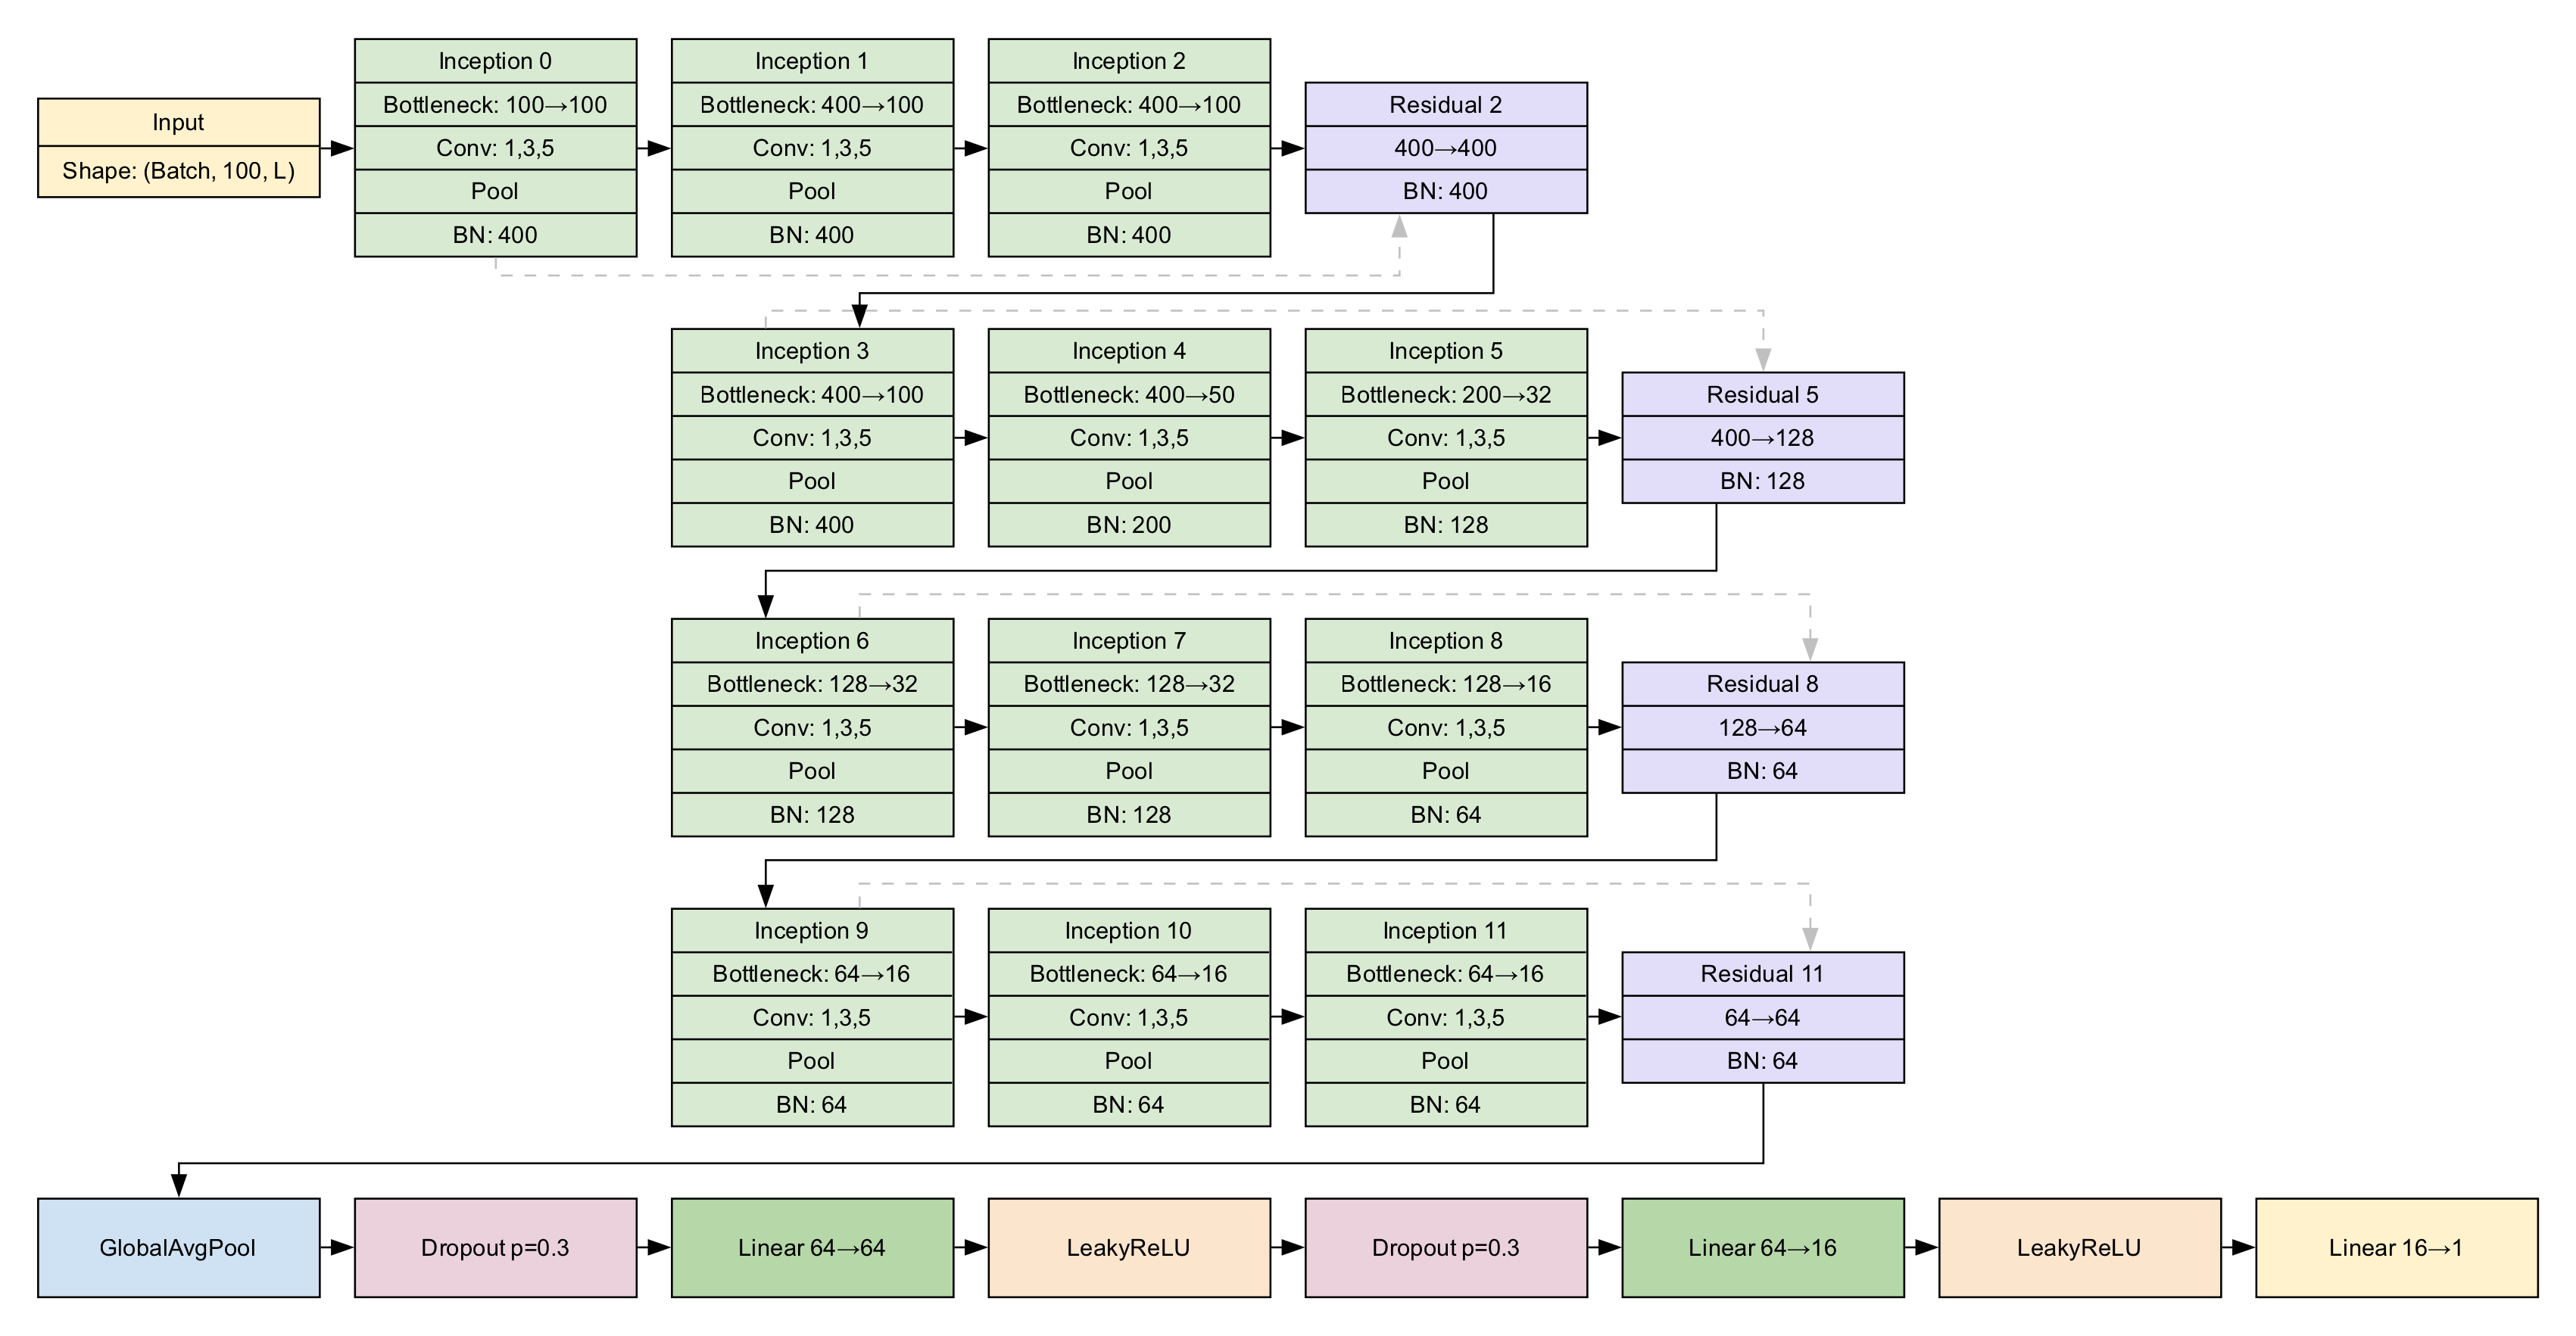

Saved architecture diagram to ./notebook_output/convDL_architectures/InceptionTime_architecture.png


In [4]:
def inceptiontime_graphviz():
    dot = Digraph(
        format="png",
        graph_attr={
            "rankdir": "TB",
            "splines": "ortho",
            "fontsize": "14",
            "size": "8.3,11.7!",
            "ratio": "compress",
            "page": "8.3,11.7",
            "orientation": "portrait",
            "margin": "0.1,0.1",
        },
    )
    dot.attr(dpi='400')
    dot.attr(
        "node",
        shape="record",
        style="filled",
        fontname="Arial",
        fontsize="12",
        width="2",
        height="0.7",
    )

    # Row 1: Input + Inception 0-2
    with dot.subgraph() as s1:
        s1.attr(rank="same")
        s1.node("Input", "{Input | Shape: (Batch, 100, L)}", fillcolor="#fff2cc")
        s1.node("Inc0", "{Inception 0 | Bottleneck: 100→100 | Conv: 1,3,5 | Pool | BN: 400}", fillcolor="#d9ead3")
        s1.node("Inc1", "{Inception 1 | Bottleneck: 400→100 | Conv: 1,3,5 | Pool | BN: 400}", fillcolor="#d9ead3")
        s1.node("Inc2", "{Inception 2 | Bottleneck: 400→100 | Conv: 1,3,5 | Pool | BN: 400}", fillcolor="#d9ead3")
        s1.node("Res2", "{Residual 2 | 400→400 | BN: 400}", fillcolor="#e2ddf8")

    # Row 2: Inception 3-5 + Residual 5
    with dot.subgraph() as s2:
        s2.attr(rank="same")
        s2.node("Inc3", "{Inception 3 | Bottleneck: 400→100 | Conv: 1,3,5 | Pool | BN: 400}", fillcolor="#d9ead3")
        s2.node("Inc4", "{Inception 4 | Bottleneck: 400→50 | Conv: 1,3,5 | Pool | BN: 200}", fillcolor="#d9ead3")
        s2.node("Inc5", "{Inception 5 | Bottleneck: 200→32 | Conv: 1,3,5 | Pool | BN: 128}", fillcolor="#d9ead3")
        s2.node("Res5", "{Residual 5 | 400→128 | BN: 128}", fillcolor="#e2ddf8")

    # Row 3: Inception 6-8 + Residual 8
    with dot.subgraph() as s3:
        s3.attr(rank="same")
        s3.node("Inc6", "{Inception 6 | Bottleneck: 128→32 | Conv: 1,3,5 | Pool | BN: 128}", fillcolor="#d9ead3")
        s3.node("Inc7", "{Inception 7 | Bottleneck: 128→32 | Conv: 1,3,5 | Pool | BN: 128}", fillcolor="#d9ead3")
        s3.node("Inc8", "{Inception 8 | Bottleneck: 128→16 | Conv: 1,3,5 | Pool | BN: 64}", fillcolor="#d9ead3")
        s3.node("Res8", "{Residual 8 | 128→64 | BN: 64}", fillcolor="#e2ddf8")

    # Row 4: Inception 9-11 + Residual 11
    with dot.subgraph() as s4:
        s4.attr(rank="same")
        s4.node("Inc9", "{Inception 9 | Bottleneck: 64→16 | Conv: 1,3,5 | Pool | BN: 64}", fillcolor="#d9ead3")
        s4.node("Inc10", "{Inception 10 | Bottleneck: 64→16 | Conv: 1,3,5 | Pool | BN: 64}", fillcolor="#d9ead3")
        s4.node("Inc11", "{Inception 11 | Bottleneck: 64→16 | Conv: 1,3,5 | Pool | BN: 64}", fillcolor="#d9ead3")
        s4.node("Res11", "{Residual 11 | 64→64 | BN: 64}", fillcolor="#e2ddf8")

    # Row 5: Final layers
    with dot.subgraph() as s5:
        s5.attr(rank="same")
        s5.node("GAP", "{GlobalAvgPool}", fillcolor="#cfe2f3")
        s5.node("Drop1", "{Dropout p=0.3}", fillcolor="#ead1dc")
        s5.node("FC1", "{Linear 64→64}", fillcolor="#b6d7a8")
        s5.node("ReLU1", "{LeakyReLU}", fillcolor="#fce5cd")
        s5.node("Drop2", "{Dropout p=0.3}", fillcolor="#ead1dc")
        s5.node("FC2", "{Linear 64→16}", fillcolor="#b6d7a8")
        s5.node("ReLU2", "{LeakyReLU}", fillcolor="#fce5cd")
        s5.node("Output", "{Linear 16→1}", fillcolor="#fff2cc")

    # Main flow
    dot.edge("Input", "Inc0")
    dot.edge("Inc0", "Inc1")
    dot.edge("Inc1", "Inc2")
    dot.edge("Inc2", "Res2")
    dot.edge("Res2", "Inc3")
    dot.edge("Inc3", "Inc4")
    dot.edge("Inc4", "Inc5")
    dot.edge("Inc5", "Res5")
    dot.edge("Res5", "Inc6")
    dot.edge("Inc6", "Inc7")
    dot.edge("Inc7", "Inc8")
    dot.edge("Inc8", "Res8")
    dot.edge("Res8", "Inc9")
    dot.edge("Inc9", "Inc10")
    dot.edge("Inc10", "Inc11")
    dot.edge("Inc11", "Res11")
    dot.edge("Res11", "GAP")
    dot.edge("GAP", "Drop1")
    dot.edge("Drop1", "FC1")
    dot.edge("FC1", "ReLU1")
    dot.edge("ReLU1", "Drop2")
    dot.edge("Drop2", "FC2")
    dot.edge("FC2", "ReLU2")
    dot.edge("ReLU2", "Output")

    # Residual skip connections (dashed)
    dot.edge("Inc0", "Res2", style="dashed", color="gray")
    dot.edge("Inc3", "Res5", style="dashed", color="gray")
    dot.edge("Inc6", "Res8", style="dashed", color="gray")
    dot.edge("Inc9", "Res11", style="dashed", color="gray")

    # Render and display
    out_path = os.path.join(output_dir, "InceptionTime_architecture")
    dot.render(out_path, cleanup=True)
    display(Image(filename=out_path + ".png"))
    print(f"Saved architecture diagram to {out_path + '.png'}")

inceptiontime_graphviz()

## LSTM

LSTMModel(
(lstm_layers): ModuleList(
(0): LSTM(100, 256, batch_first=True)
(1): LSTM(256, 128, batch_first=True)
(2): LSTM(128, 64, batch_first=True)
)
(dropout_layers): ModuleList(
(0): Dropout(p=0.2, inplace=False)
(1): Dropout(p=0.3, inplace=False)
(2): Dropout(p=0.4, inplace=False)
)
(batch_norm_layers): ModuleList(
(0): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
(1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
(2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
(dense1): Linear(in_features=64, out_features=64, bias=True)
(dense2): Linear(in_features=64, out_features=32, bias=True)
(dense3): Linear(in_features=32, out_features=1, bias=True)
(dropout_final): Dropout(p=0.4, inplace=False)
)

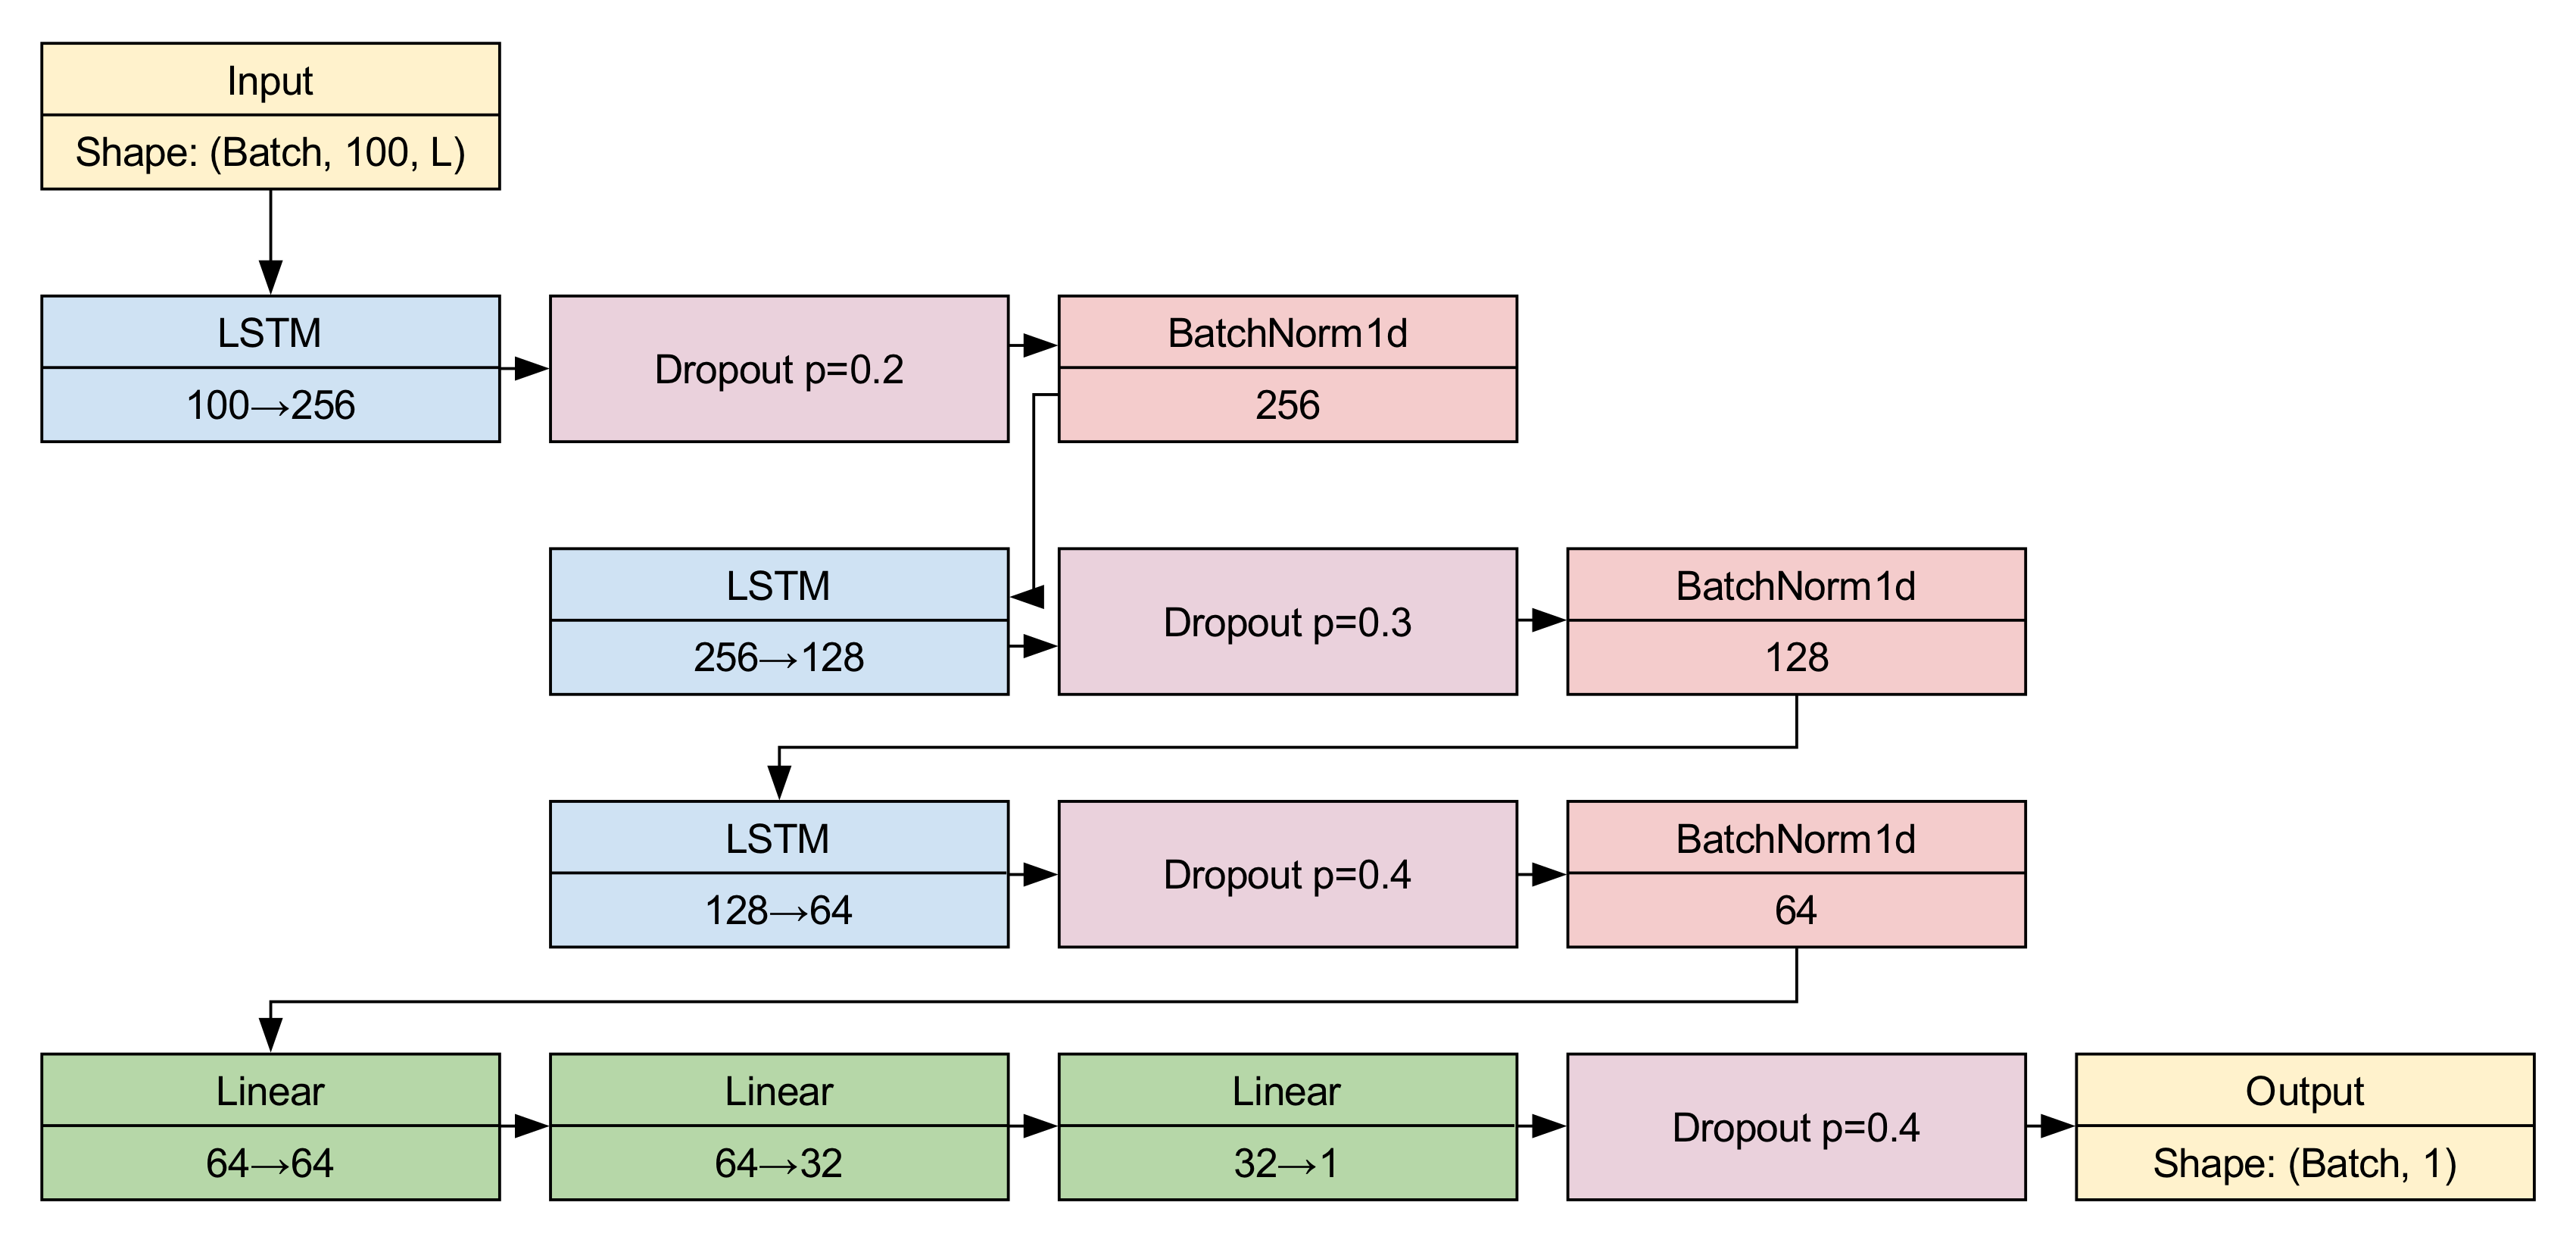

Saved architecture diagram to ./notebook_output/convDL_architectures/LSTMModel_architecture.png


In [5]:
def lstmmodel_graphviz():
    dot = Digraph(
        format="png",
        graph_attr={
            "rankdir": "TB",  # Top to Bottom for portrait
            "splines": "ortho",
            "fontsize": "16",
            "size": "8.3,11.7!",  # A4 portrait
            "ratio": "compress",
            "page": "8.3,11.7",
            "orientation": "portrait",
            "margin": "0.1,0.1",
        },
    )
    dot.attr(dpi='400')
    dot.attr(
        "node",
        shape="record",
        style="filled",
        fontname="Arial",
        fontsize="14",
        width="2.2",
        height="0.7",
    )

    # Input
    dot.node("Input", "{Input | Shape: (Batch, 100, L)}", fillcolor="#fff2cc")

    # LSTM layers and dropouts (grouped in rows)
    with dot.subgraph() as s1:
        s1.attr(rank="same")
        s1.node("LSTM1", "{LSTM | 100→256}", fillcolor="#cfe2f3")
        s1.node("Drop1", "{Dropout p=0.2}", fillcolor="#ead1dc")
        s1.node("BN1", "{BatchNorm1d | 256}", fillcolor="#f4cccc")
    with dot.subgraph() as s2:
        s2.attr(rank="same")
        s2.node("LSTM2", "{LSTM | 256→128}", fillcolor="#cfe2f3")
        s2.node("Drop2", "{Dropout p=0.3}", fillcolor="#ead1dc")
        s2.node("BN2", "{BatchNorm1d | 128}", fillcolor="#f4cccc")
    with dot.subgraph() as s3:
        s3.attr(rank="same")
        s3.node("LSTM3", "{LSTM | 128→64}", fillcolor="#cfe2f3")
        s3.node("Drop3", "{Dropout p=0.4}", fillcolor="#ead1dc")
        s3.node("BN3", "{BatchNorm1d | 64}", fillcolor="#f4cccc")

    # Dense layers

    with dot.subgraph() as s4:
        s4.attr(rank="same")
        s4.node("Dense1", "{Linear | 64→64}", fillcolor="#b6d7a8")
        s4.node("Dense2", "{Linear | 64→32}", fillcolor="#b6d7a8")
        s4.node("Dense3", "{Linear | 32→1}", fillcolor="#b6d7a8")
        s4.node("DropFinal", "{Dropout p=0.4}", fillcolor="#ead1dc")
        s4.node("Output", "{Output | Shape: (Batch, 1)}", fillcolor="#fff2cc")

    # Main flow
    dot.edge("Input", "LSTM1")
    dot.edge("LSTM1", "Drop1")
    dot.edge("Drop1", "BN1")
    dot.edge("BN1", "LSTM2")
    dot.edge("LSTM2", "Drop2")
    dot.edge("Drop2", "BN2")
    dot.edge("BN2", "LSTM3")
    dot.edge("LSTM3", "Drop3")
    dot.edge("Drop3", "BN3")
    dot.edge("BN3", "Dense1")
    dot.edge("Dense1", "Dense2")
    dot.edge("Dense2", "Dense3")
    dot.edge("Dense3", "DropFinal")
    dot.edge("DropFinal", "Output")

    # Render and display
    out_path = os.path.join(output_dir, "LSTMModel_architecture")
    dot.render(out_path, cleanup=True)
    display(Image(filename=out_path + ".png"))
    print(f"Saved architecture diagram to {out_path + '.png'}")

lstmmodel_graphviz()

## GRU

GRUModel(
(gru_layers): ModuleList(
(0): GRU(100, 64, batch_first=True)
(1-2): 2 x GRU(64, 64, batch_first=True)
)
(dropout_layers): ModuleList(
(0): Dropout(p=0.2, inplace=False)
(1-2): 2 x Dropout(p=0.3, inplace=False)
)
(batch_norm_layers): ModuleList(
(0-2): 3 x BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
(fc): Sequential(
(0): Dropout(p=0.4, inplace=False)
(1): Linear(in_features=64, out_features=64, bias=True)
(2): LeakyReLU(negative_slope=0.01)
(3): Dropout(p=0.5, inplace=False)
(4): Linear(in_features=64, out_features=16, bias=True)
(5): LeakyReLU(negative_slope=0.01)
(6): Linear(in_features=16, out_features=1, bias=True)
)
)


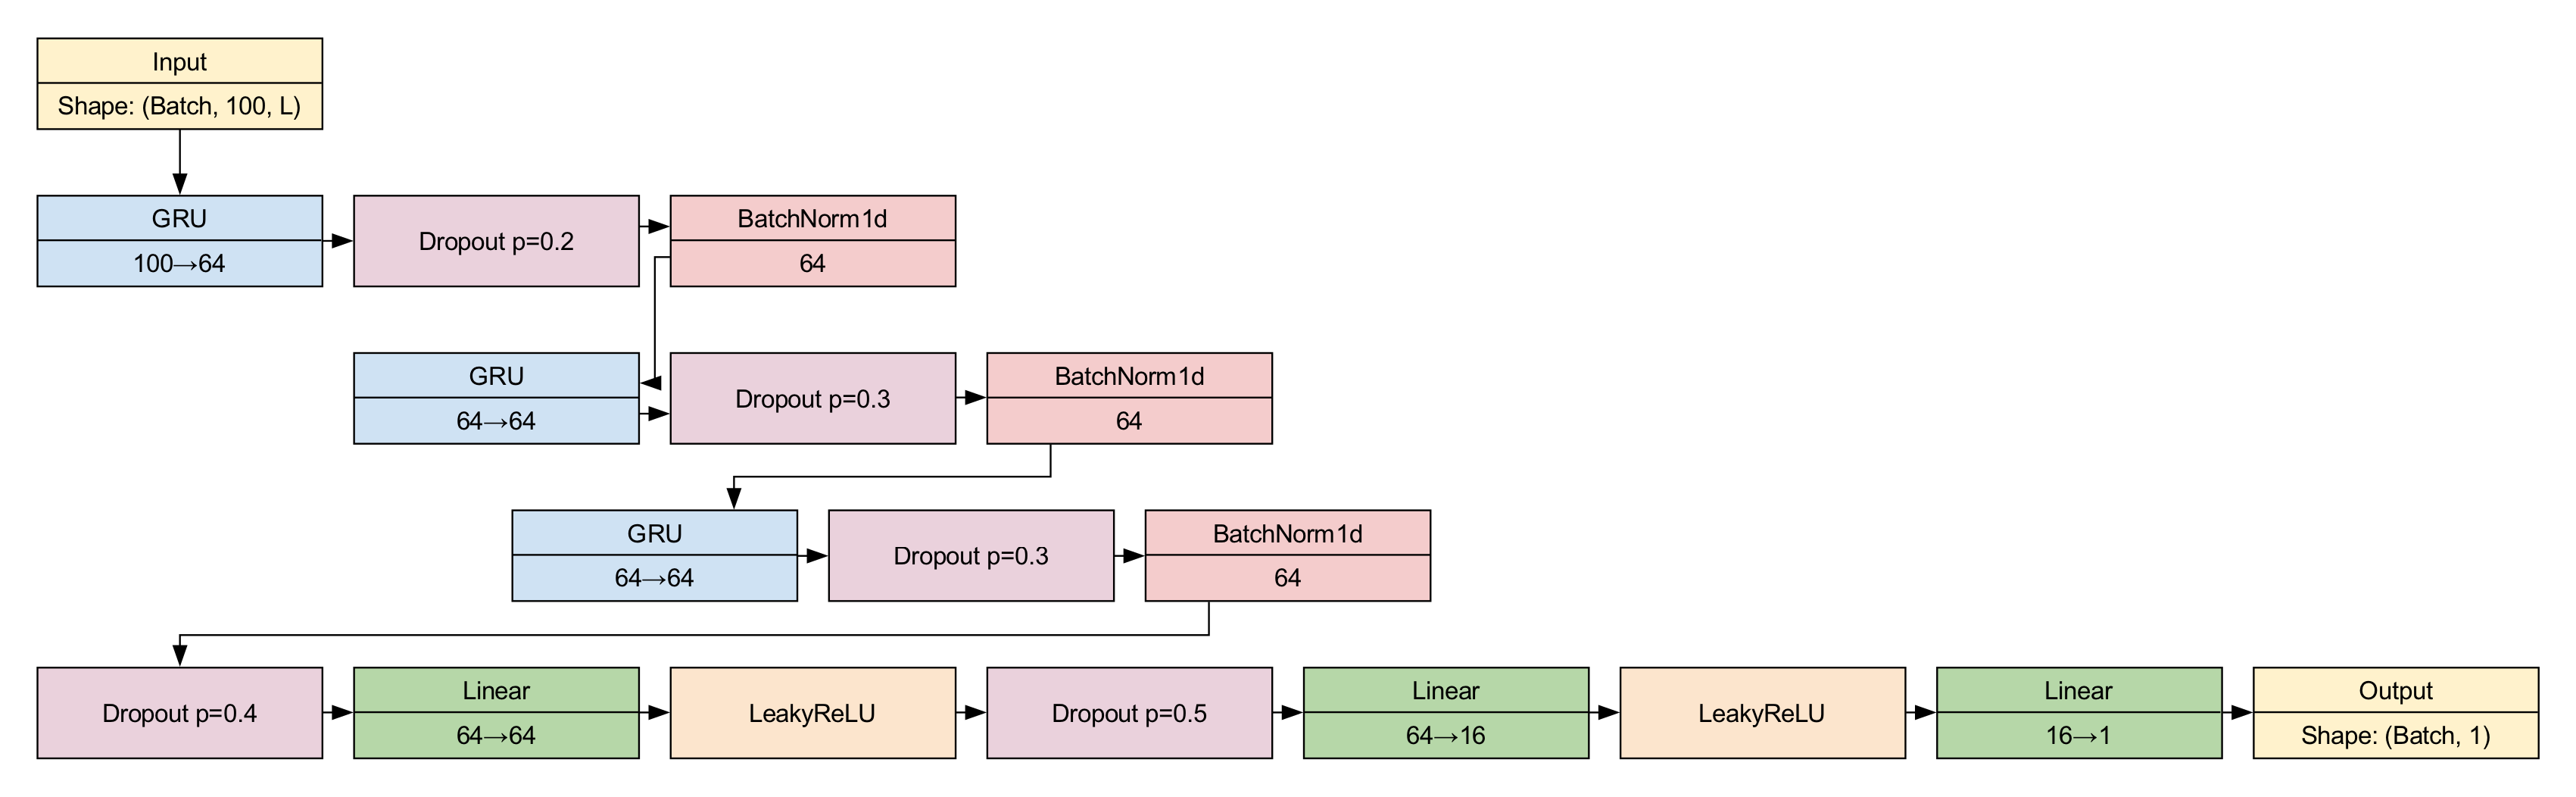

Saved architecture diagram to ./notebook_output/convDL_architectures/GRUModel_architecture.png


In [6]:
def grumodel_graphviz():
    dot = Digraph(
        format="png",
        graph_attr={
            "rankdir": "TB",  # Top to Bottom for portrait
            "splines": "ortho",
            "fontsize": "16",
            "size": "8.3,11.7!",  # A4 portrait
            "ratio": "compress",
            "page": "8.3,11.7",
            "orientation": "portrait",
            "margin": "0.1,0.1",
        },
    )
    dot.attr(dpi='400')
    dot.attr(
        "node",
        shape="record",
        style="filled",
        fontname="Arial",
        fontsize="14",
        width="2.2",
        height="0.7",
    )

    # Input
    dot.node("Input", "{Input | Shape: (Batch, 100, L)}", fillcolor="#fff2cc")

    # GRU layers and dropouts (grouped in rows)
    with dot.subgraph() as s1:
        s1.attr(rank="same")
        s1.node("GRU1", "{GRU | 100→64}", fillcolor="#cfe2f3")
        s1.node("Drop1", "{Dropout p=0.2}", fillcolor="#ead1dc")
        s1.node("BN1", "{BatchNorm1d | 64}", fillcolor="#f4cccc")
    with dot.subgraph() as s2:
        s2.attr(rank="same")
        s2.node("GRU2", "{GRU | 64→64}", fillcolor="#cfe2f3")
        s2.node("Drop2", "{Dropout p=0.3}", fillcolor="#ead1dc")
        s2.node("BN2", "{BatchNorm1d | 64}", fillcolor="#f4cccc")
    with dot.subgraph() as s3:
        s3.attr(rank="same")
        s3.node("GRU3", "{GRU | 64→64}", fillcolor="#cfe2f3")
        s3.node("Drop3", "{Dropout p=0.3}", fillcolor="#ead1dc")
        s3.node("BN3", "{BatchNorm1d | 64}", fillcolor="#f4cccc")

    # Sequential block (horizontal row)
    with dot.subgraph() as s4:
        s4.attr(rank="same")
        s4.node("SeqDrop1", "{Dropout p=0.4}", fillcolor="#ead1dc")
        s4.node("SeqLin1", "{Linear | 64→64}", fillcolor="#b6d7a8")
        s4.node("SeqReLU1", "{LeakyReLU}", fillcolor="#fce5cd")
        s4.node("SeqDrop2", "{Dropout p=0.5}", fillcolor="#ead1dc")
        s4.node("SeqLin2", "{Linear | 64→16}", fillcolor="#b6d7a8")
        s4.node("SeqReLU2", "{LeakyReLU}", fillcolor="#fce5cd")
        s4.node("SeqLin3", "{Linear | 16→1}", fillcolor="#b6d7a8")
        s4.node("Output", "{Output | Shape: (Batch, 1)}", fillcolor="#fff2cc")

    # Main flow
    dot.edge("Input", "GRU1")
    dot.edge("GRU1", "Drop1")
    dot.edge("Drop1", "BN1")
    dot.edge("BN1", "GRU2")
    dot.edge("GRU2", "Drop2")
    dot.edge("Drop2", "BN2")
    dot.edge("BN2", "GRU3")
    dot.edge("GRU3", "Drop3")
    dot.edge("Drop3", "BN3")
    dot.edge("BN3", "SeqDrop1")
    dot.edge("SeqDrop1", "SeqLin1")
    dot.edge("SeqLin1", "SeqReLU1")
    dot.edge("SeqReLU1", "SeqDrop2")
    dot.edge("SeqDrop2", "SeqLin2")
    dot.edge("SeqLin2", "SeqReLU2")
    dot.edge("SeqReLU2", "SeqLin3")
    dot.edge("SeqLin3", "Output")

    # Render and display
    out_path = os.path.join(output_dir, "GRUModel_architecture")
    dot.render(out_path, cleanup=True)
    display(Image(filename=out_path + ".png"))
    print(f"Saved architecture diagram to {out_path + '.png'}")

grumodel_graphviz()